Phys 540 project 2
<br> Andrew Koren

So, for both of these problems, or any problem with lots of matrix multiplication, a great package to pick up the work is Sympy, basically allowing for symbolic operations like Mathematica. For both of these problems, I'm going to use some Sympy code to implement each matrix.

In [1]:
from sympy import *

f, d = symbols('f d', real=True, positive=True)

Focusing = Matrix([[1,0],[-1/f,1]])
Drift = Matrix([[1,d],[0,1]])
Defocusing = Matrix([[1,0],[1/f,1]])

print('Focusing, Drift, Defocusing:')
display(Focusing, Drift, Defocusing)

print('beamline: FODO (matrix in reverse order)')
FODO = MatMul(Defocusing,Drift,Focusing,Drift, evaluate=False)
display(FODO)
display(simplify(FODO.doit()))

Focusing, Drift, Defocusing:


Matrix([
[   1, 0],
[-1/f, 1]])

Matrix([
[1, d],
[0, 1]])

Matrix([
[  1, 0],
[1/f, 1]])

beamline: FODO (matrix in reverse order)


Matrix([
[  1, 0],
[1/f, 1]])*Matrix([
[1, d],
[0, 1]])*Matrix([
[   1, 0],
[-1/f, 1]])*Matrix([
[1, d],
[0, 1]])

Matrix([
[(-d + f)/f,       d*(-d + 2*f)/f],
[   -d/f**2, -d**2/f**2 + d/f + 1]])

To show my work, I'll perform each matrix multiplication step-by-step using the code below:

In [2]:
def step_by_step_mul(operations: list):
    '''
    Matrix multiplication (xf) = [On,On-1,...,O2,O1](xi)
    '''
    O_r = operations[-1]
    for i in range(-1, -len(operations), -1):
            display(simplify(MatMul(*operations[0:i],O_r)))
            O_r = operations[i-1]*O_r
    result = expand(O_r)
    display(result)
    return result

result = step_by_step_mul([Defocusing,Drift,Focusing,Drift])

Matrix([
[  1, 0],
[1/f, 1]])*Matrix([
[1, d],
[0, 1]])*Matrix([
[   1, 0],
[-1/f, 1]])*Matrix([
[1, d],
[0, 1]])

Matrix([
[  1, 0],
[1/f, 1]])*Matrix([
[1, d],
[0, 1]])*Matrix([
[   1,          d],
[-1/f, (-d + f)/f]])

Matrix([
[  1, 0],
[1/f, 1]])*Matrix([
[(-d + f)/f, d*(-d + 2*f)/f],
[      -1/f,     (-d + f)/f]])

Matrix([
[-d/f + 1,        -d**2/f + 2*d],
[ -d/f**2, -d**2/f**2 + d/f + 1]])

<!-- For question 2, I also have code to create a twiss propogation matrix from the transfer matrix

```python

S, C, Sp, Cp = symbols('S C S\' C\' ')
M = MatrixSymbol('M',3,3)

Twiss_Propogation_Matrix = Matrix([
    [C*C, -2*S*C, S*S],
    [-C*Cp, Sp*C + S*C, -S*Sp],
    [Cp*Cp, -2*Sp*Cp, Sp*Sp]
    ])
display(Eq(M, Twiss_Propogation_Matrix))

def transfer_to_twiss(transfer_matrix):
    '''Twiss 1D Parameter Evolution Matrix'''

    [[a,b],[c,d]] = transfer_matrix.tolist()
    parameters = {
        C: a,
        S: b,
        Cp: c,
        Sp: d
        }
    result = Twiss_Propogation_Matrix.subs(parameters)
    return result

```

where
$$


    K \equiv \begin{pmatrix}
    \beta & - \alpha
\\  -\alpha & \gamma
\end{pmatrix}
\\  K = M K_0 M^T
$$ -->


For consistency, I'll use:
- lower case for symbols
- upper case for specific matricies
- focusing/defocusing strength $f$ will be strictly positive.

1. Telescopic system. 
- the transfer matrix in the $x$-plane is

In [3]:
f_1, f_2 = symbols('f_1 f_2', real=True, positive=True)

F1 = Focusing.replace(f, f_1)
F2 = Focusing.replace(f, f_2)
O1 = Drift.replace(d,f_1)
O2 = Drift.replace(d,f_2)


Telescope = [O2,F2,O2,O1,F1,O1]
Transfer_x = step_by_step_mul(Telescope)

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[     1, 0],
[-1/f_2, 1]])*Matrix([
[1, f_2],
[0,   1]])*Matrix([
[1, f_1],
[0,   1]])*Matrix([
[     1, 0],
[-1/f_1, 1]])*Matrix([
[1, f_1],
[0,   1]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[     1, 0],
[-1/f_2, 1]])*Matrix([
[1, f_2],
[0,   1]])*Matrix([
[1, f_1],
[0,   1]])*Matrix([
[     1, f_1],
[-1/f_1,   0]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[     1, 0],
[-1/f_2, 1]])*Matrix([
[1, f_2],
[0,   1]])*Matrix([
[     0, f_1],
[-1/f_1,   0]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[     1, 0],
[-1/f_2, 1]])*Matrix([
[-f_2/f_1, f_1],
[  -1/f_1,   0]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[-f_2/f_1,      f_1],
[       0, -f_1/f_2]])

Matrix([
[-f_2/f_1,        0],
[       0, -f_1/f_2]])

This yields both $\langle x | x' \rangle = 0$ and $\langle x'|x \rangle=0$, so the system is both imaging and telescoping in the x-plane. However, for the y-plane, we have

In [4]:
# the 'focusing' magnets have a defocusing effect on y
# I still call them F1, F2 for consistency
F1_y = F1.subs(f_1,-f_1)
F2_y = F2.subs(f_2,-f_2)

Telescope = [O2,F2_y,O2,O1,F1_y,O1] 
Transfer_y = step_by_step_mul(Telescope)

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[    1, 0],
[1/f_2, 1]])*Matrix([
[1, f_2],
[0,   1]])*Matrix([
[1, f_1],
[0,   1]])*Matrix([
[    1, 0],
[1/f_1, 1]])*Matrix([
[1, f_1],
[0,   1]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[    1, 0],
[1/f_2, 1]])*Matrix([
[1, f_2],
[0,   1]])*Matrix([
[1, f_1],
[0,   1]])*Matrix([
[    1, f_1],
[1/f_1,   2]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[    1, 0],
[1/f_2, 1]])*Matrix([
[1, f_2],
[0,   1]])*Matrix([
[    2, 3*f_1],
[1/f_1,     2]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[    1, 0],
[1/f_2, 1]])*Matrix([
[2 + f_2/f_1, 3*f_1 + 2*f_2],
[      1/f_1,             2]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[  2 + f_2/f_1, 3*f_1 + 2*f_2],
[2/f_2 + 2/f_1, 3*f_1/f_2 + 4]])

Matrix([
[4 + 3*f_2/f_1, 6*f_1 + 6*f_2],
[2/f_2 + 2/f_1, 3*f_1/f_2 + 4]])

which explains why the system does not work in the y-plane

- Now we'll use $K=M K_0 M^T$ to find $\alpha$ and $\beta$ at position $x_1$ and $x_2$

$$
    K \equiv \begin{pmatrix}
    \beta & - \alpha
\\  -\alpha & \gamma
\end{pmatrix}
$$

<!-- alpha_1, alpha_2, beta_1, beta_2, gamma_1, gamma_2 = symbols('alpha_(1:3) beta_(1:3) gamma_(1:3)')

K_1 = Matrix([
    [beta_1, -alpha_1],
    [-alpha_1, gamma_1]
    ])
K_2 = Matrix([
    [beta_2, -alpha_2],
    [-alpha_2, gamma_2]
    ])

K_1f = simplify(expand(Transfer_x * K_1 * Transfer_x.T))
K_2f = simplify(expand(Transfer_y * K_2 * Transfer_y.T))

display(K_1f, K_2f) -->

In [5]:
alpha_1, alpha_2, beta_1, beta_2, gamma_1, gamma_2 = symbols('alpha_(1:3) beta_(1:3) gamma_(1:3)', real=True)

K1 = Matrix([
    [beta_1, -alpha_1],
    [-alpha_1, gamma_1]
    ])
K2 = Matrix([
    [beta_2, -alpha_2],
    [-alpha_2, gamma_2]
    ])

Eq(K2, Transfer_x*K1*Transfer_x.T)


Eq(Matrix([
[  beta_2, -alpha_2],
[-alpha_2,  gamma_2]]), Matrix([
[beta_1*f_2**2/f_1**2,              -alpha_1],
[            -alpha_1, f_1**2*gamma_1/f_2**2]]))

Element-by-element, we see $\alpha$ is unchanged, while $\beta$ is scaled by ${f_2^2 \over f_1^2}$

- For phase advance, we'll use
$$
      \cos \Delta \psi 
    = {\langle x|x\rangle \beta_1 - \langle x|x'\rangle\alpha_1 \over \sqrt{\beta_1 \beta_2}}
\\    \sin \Delta \psi
    = {\langle x|x'\rangle \over \sqrt{\beta_1 \beta_2}}
$$

In [6]:
[a, b], [_, _] = Transfer_x.tolist()
beta_2 = beta_1 * f_2*f_2 / (f_1*f_1)

cos_dpsi = expand((a*beta_1 - b * alpha_1)/(sqrt(beta_1*beta_2)))
sin_dpsi = expand(b/sqrt(beta_1*beta_2))
display(cos_dpsi, sin_dpsi)

-beta_1/Abs(beta_1)

0

The cosine term reduces down to $\cos^{-1}(-1)=\pi$ in agreement with the sine term. Note that $-\pi$ phase advance is the same as $\pi$ phase advance.

- For telescoping in both planes, we'll need defocusing as well as focusing, with less obvious distances. I'm quite lazy, so I've copied the diagram from class below

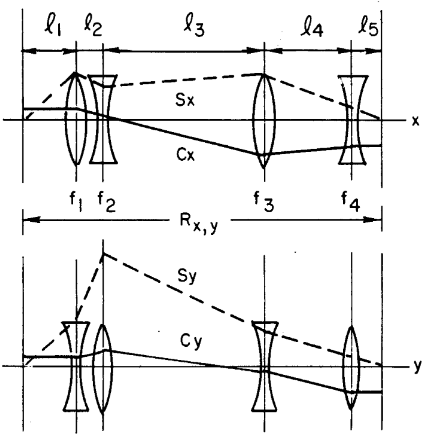

It isn't actually too hard to find the distance/strength relations, we need only find the transfer matricies for both planes and compute when $\langle x' | x \rangle = \langle y' | y \rangle = 0$. Let's make use of those tensor products now

In [7]:
from sympy.physics.quantum import TensorProduct

l_1, l_2, l_3, l_4, l_5, f_3, f_4 = symbols('l_(1:6) f_3 f_4', real=True, positive=True)

TO1 = TensorProduct(eye(2),Drift.subs(d,l_1))
TO2 = TensorProduct(eye(2),Drift.subs(d,l_2))
TO3 = TensorProduct(eye(2),Drift.subs(d,l_3))
TO4 = TensorProduct(eye(2),Drift.subs(d,l_4))
TO5 = TensorProduct(eye(2),Drift.subs(d,l_5))

TF1 = Matrix([
    [F1, zeros(2,2)],
    [zeros(2,2), F1_y]
    ])
TD2 = TF1.replace(f_1, -f_2)
TF3 = TF1.replace(f_1,  f_3)
TD4 = TF1.replace(f_1, -f_4)

display(TO1)
display(TF1)
display(TD2)

Matrix([
[1, l_1, 0,   0],
[0,   1, 0,   0],
[0,   0, 1, l_1],
[0,   0, 0,   1]])

Matrix([
[     1, 0,     0, 0],
[-1/f_1, 1,     0, 0],
[     0, 0,     1, 0],
[     0, 0, 1/f_1, 1]])

Matrix([
[    1, 0,      0, 0],
[1/f_2, 1,      0, 0],
[    0, 0,      1, 0],
[    0, 0, -1/f_2, 1]])

Assembling according to the diagram yields

In [8]:
Telescope_2D = [TO5, TD4, TO4, TF3, TO3, TD2, TO2, TF1, TO1]
# step-by-step gets a little to big
# simplify(step_by_step_mul(Telescope_2D))

Transfer_xy = simplify(MatMul(*Telescope_2D).doit())
#display(Transfer_xy) too big to see expanded

Which is so big it goes off the screen. I think the best way to solve this is to take a peek at the final/desired result from the slides, then subtract that from my oversized matrix and use a linear algebra solver to spit out our desired relations.

In [9]:
m_x, m_y = symbols('m_x m_y', real=True, positive=True)

target_vars = [l_1, l_2, l_3, l_4, l_5]

M_Solution = diag(-m_x, -1/m_x, -m_y, -1/m_y)
Zero_Matrix = Transfer_xy-M_Solution
eqs = list(set(Zero_Matrix))
clean_eqs = [numer(simplify(e)) for e in eqs if e != 0] # orders everything nice
#solution = solve(clean_eqs, target_vars)
#solution

2. We can do this pretty easily with sympy again. From class we know to use $f = {l \over \sqrt{2}}$, and we can work out the rest from there.

In [59]:
l, q1, q2 = symbols('l Q1 Q2', real=True, positive=True)

L12 = Drift.replace(d, l/2)
L = Drift.replace(d,l)
F = Focusing.subs(f, l/sqrt(2))
D = Defocusing.subs(f, l/sqrt(2))
Q1 = Defocusing.subs(f, q1)
Q2 = Focusing.subs(f, q2)

# should we keep f = l/sqrt(2)? Yep, garuntees µ=π/2
Quarter_Wave = [Q2,L12,D,L,F,L12,Q1] 

QW_Transfer = step_by_step_mul(Quarter_Wave)

Matrix([
[    1, 0],
[-1/Q2, 1]])*Matrix([
[1, l/2],
[0,   1]])*Matrix([
[        1, 0],
[sqrt(2)/l, 1]])*Matrix([
[1, l],
[0, 1]])*Matrix([
[         1, 0],
[-sqrt(2)/l, 1]])*Matrix([
[1, l/2],
[0,   1]])*Matrix([
[   1, 0],
[1/Q1, 1]])

Matrix([
[    1, 0],
[-1/Q2, 1]])*Matrix([
[1, l/2],
[0,   1]])*Matrix([
[        1, 0],
[sqrt(2)/l, 1]])*Matrix([
[1, l],
[0, 1]])*Matrix([
[         1, 0],
[-sqrt(2)/l, 1]])*Matrix([
[(Q1 + l/2)/Q1, l/2],
[         1/Q1,   1]])

Matrix([
[    1, 0],
[-1/Q2, 1]])*Matrix([
[1, l/2],
[0,   1]])*Matrix([
[        1, 0],
[sqrt(2)/l, 1]])*Matrix([
[1, l],
[0, 1]])*Matrix([
[                      (Q1 + l/2)/Q1,           l/2],
[(2*l - sqrt(2)*(2*Q1 + l))/(2*Q1*l), 1 - sqrt(2)/2]])

Matrix([
[    1, 0],
[-1/Q2, 1]])*Matrix([
[1, l/2],
[0,   1]])*Matrix([
[        1, 0],
[sqrt(2)/l, 1]])*Matrix([
[(2*Q1 + 3*l - sqrt(2)*(2*Q1 + l))/(2*Q1), l*(3 - sqrt(2))/2],
[     (2*l - sqrt(2)*(2*Q1 + l))/(2*Q1*l),     1 - sqrt(2)/2]])

Matrix([
[    1, 0],
[-1/Q2, 1]])*Matrix([
[1, l/2],
[0,   1]])*Matrix([
[(2*Q1 + 3*l - sqrt(2)*(2*Q1 + l))/(2*Q1), l*(3 - sqrt(2))/2],
[                       -2/l + sqrt(2)/Q1,           sqrt(2)]])

Matrix([
[    1, 0],
[-1/Q2, 1]])*Matrix([
[-sqrt(2) + 3*l/(2*Q1),   3*l/2],
[    -2/l + sqrt(2)/Q1, sqrt(2)]])

Matrix([
[                         -sqrt(2) + 3*l/(2*Q1),                3*l/2],
[-2/l + sqrt(2)/Q2 + sqrt(2)/Q1 - 3*l/(2*Q1*Q2), sqrt(2) - 3*l/(2*Q2)]])

<!-- We also need quarter-wave phase advance $\Delta \mu = {\pi \over 2}$. 

$$
    \Delta \psi = {\pi \over 2}
\\  \sqrt{\beta_1\beta_2} = {3 l \over 2}
\\  l = {2 \over 3} \sqrt{\beta_1 \beta_2}
$$

$$
\\  {3l \over 2Q_1} -\sqrt{2} -{3 l \alpha_1 \over 2} = 0
\\  {\sqrt{\beta_1 \beta_2} \over Q_1} = \alpha_1 \sqrt{\beta_1 \beta_2} + \sqrt{2}
\\  Q_1 = \frac{\sqrt{\beta_1 \beta_2}}{\alpha_1 \sqrt{\beta_1 \beta_2} + \sqrt{2}}
$$
We've already got $l$ and $Q_1$ taken care of. --> 

To get $Q_1$ and $Q_2$, I was planning to use $K_2 = M K_1 M^T$, but I have some nice code to compute the Twiss Transfer matrix that I want to try out. This allows us to compute

$$
    \begin{pmatrix} \beta_2 \\ \alpha_2 \\ \gamma_2 \end{pmatrix} 
    = M_{TWISS}  \begin{pmatrix} \beta_1 \\ \alpha_1 \\ \gamma_1 \end{pmatrix} 
$$

In [61]:
s, c, sp, cp = symbols('S C S\' C\' ')
M = MatrixSymbol('M_TWISS',3,3)

Twiss_Propogation_Matrix = Matrix([
    [c*c, -2*s*c, s*s],
    [-c*cp, sp*c + s*s, -s*sp],
    [cp*cp, -2*sp*cp, sp*sp]
    ])
display(Eq(M, Twiss_Propogation_Matrix))

def transfer_to_twiss(Transfer_Matrix):
    '''Twiss 1D Parameter Evolution Matrix'''

    [[a,b],[cee,d]] = Transfer_Matrix.tolist()
    parameters = {
        c: a,
        s: b,
        cp: cee,
        sp: d
        }
    Result = Twiss_Propogation_Matrix.subs(parameters)
    return Result


Eq(M_TWISS, Matrix([
[ C**2,      -2*C*S,  S**2],
[-C*C', C*S' + S**2, -S*S'],
[C'**2,    -2*C'*S', S'**2]]))

In class we never discussed $\gamma$. Should I assume $\gamma = 0$ throughout? I'll just use $\gamma_1 = 0$ and ignore $\gamma_2$. I'll start with trying to find $Q_1$ in terms of the other parameters

In [67]:
Twiss_Transfer = transfer_to_twiss(QW_Transfer)
beta2_transfer, alpha2_transfer, _ = Twiss_Transfer*Matrix([[beta_1],[alpha_1],[0]])
display(Eq(beta_2, beta2_transfer), Eq(alpha_2, alpha2_transfer))

Eq(beta_2, -3*alpha_1*l*(-sqrt(2) + 3*l/(2*Q1)) + beta_1*(-sqrt(2) + 3*l/(2*Q1))**2)

Eq(alpha_2, alpha_1*(9*l**2/4 + (-sqrt(2) + 3*l/(2*Q1))*(sqrt(2) - 3*l/(2*Q2))) - beta_1*(-sqrt(2) + 3*l/(2*Q1))*(-2/l + sqrt(2)/Q2 + sqrt(2)/Q1 - 3*l/(2*Q1*Q2)))

In [81]:
sol1, sol2 = solve(Eq(beta_2, beta2_transfer), q1)
display(simplify(sol1), simplify(sol2))


3*l*(3*alpha_1*l + 2*sqrt(2)*beta_1 + sqrt(9*alpha_1**2*l**2 + 4*beta_1*beta_2))/(4*(3*sqrt(2)*alpha_1*l + 2*beta_1 - beta_2))

3*l*(3*alpha_1*l + 2*sqrt(2)*beta_1 - sqrt(9*alpha_1**2*l**2 + 4*beta_1*beta_2))/(4*(3*sqrt(2)*alpha_1*l + 2*beta_1 - beta_2))

These formulas for $Q_1$ look a lot like the quadratic equation, aside from that fact these a kinda ugly. The solution for $Q_2$ is even worse

In [86]:
display(Eq(alpha_2, simplify(alpha2_transfer.subs(q1, sol1))))
display(Eq(alpha_2, simplify(alpha2_transfer.subs(q1, sol2))))

Eq(alpha_2, (3*alpha_1*l*(9*Q2*l**2*(3*alpha_1*l + 2*sqrt(2)*beta_1 + sqrt(9*alpha_1**2*l**2 + 4*beta_1*beta_2)) + 2*(2*sqrt(2)*Q2 - 3*l)*(6*sqrt(2)*alpha_1*l + 4*beta_1 - 2*beta_2 - sqrt(2)*(3*alpha_1*l + 2*sqrt(2)*beta_1 + sqrt(9*alpha_1**2*l**2 + 4*beta_1*beta_2))))*(3*alpha_1*l + 2*sqrt(2)*beta_1 + sqrt(9*alpha_1**2*l**2 + 4*beta_1*beta_2)) - 4*beta_1*(-6*Q2*(3*alpha_1*l + 2*sqrt(2)*beta_1 + sqrt(9*alpha_1**2*l**2 + 4*beta_1*beta_2)) + 4*sqrt(2)*Q2*(3*sqrt(2)*alpha_1*l + 2*beta_1 - beta_2) + 3*sqrt(2)*l*(3*alpha_1*l + 2*sqrt(2)*beta_1 + sqrt(9*alpha_1**2*l**2 + 4*beta_1*beta_2)) - 6*l*(3*sqrt(2)*alpha_1*l + 2*beta_1 - beta_2))*(6*sqrt(2)*alpha_1*l + 4*beta_1 - 2*beta_2 - sqrt(2)*(3*alpha_1*l + 2*sqrt(2)*beta_1 + sqrt(9*alpha_1**2*l**2 + 4*beta_1*beta_2))))/(12*Q2*l*(3*alpha_1*l + 2*sqrt(2)*beta_1 + sqrt(9*alpha_1**2*l**2 + 4*beta_1*beta_2))**2))

Eq(alpha_2, (alpha_1*l*(9*Q2*l**2*(3*alpha_1*l + 2*sqrt(2)*beta_1 - sqrt(9*alpha_1**2*l**2 + 4*beta_1*beta_2)) + 2*(2*sqrt(2)*Q2 - 3*l)*(6*sqrt(2)*alpha_1*l + 4*beta_1 - 2*beta_2 + sqrt(2)*(-3*alpha_1*l - 2*sqrt(2)*beta_1 + sqrt(9*alpha_1**2*l**2 + 4*beta_1*beta_2))))*(3*alpha_1*l + 2*sqrt(2)*beta_1 - sqrt(9*alpha_1**2*l**2 + 4*beta_1*beta_2))/4 - beta_1*(-6*Q2*(3*alpha_1*l + 2*sqrt(2)*beta_1 - sqrt(9*alpha_1**2*l**2 + 4*beta_1*beta_2)) + 4*sqrt(2)*Q2*(3*sqrt(2)*alpha_1*l + 2*beta_1 - beta_2) + 3*sqrt(2)*l*(3*alpha_1*l + 2*sqrt(2)*beta_1 - sqrt(9*alpha_1**2*l**2 + 4*beta_1*beta_2)) - 6*l*(3*sqrt(2)*alpha_1*l + 2*beta_1 - beta_2))*(6*sqrt(2)*alpha_1*l + 4*beta_1 - 2*beta_2 + sqrt(2)*(-3*alpha_1*l - 2*sqrt(2)*beta_1 + sqrt(9*alpha_1**2*l**2 + 4*beta_1*beta_2)))/3)/(Q2*l*(3*alpha_1*l + 2*sqrt(2)*beta_1 - sqrt(9*alpha_1**2*l**2 + 4*beta_1*beta_2))**2))

Maybe we should proceed with actual parameters from here. I'll leave $l$ unbound for now, and see if we can get reasonable values for $Q_1$ and $Q_2$ with the problem's requested parameters.

In [97]:
params = {
          alpha_1: 0,
          alpha_2: 0,
          beta_1: 5,
          beta_2: 50,
          }

display(Eq(q1,simplify(sol1.subs(params)))) 
display(Eq(q1,simplify(sol2.subs(params))))

q1_parameterized = simplify(sol2.subs(params))

False

Eq(Q1, 3*l*(-sqrt(2) + sqrt(10))/16)

Sympy spittiong out "False" means the first solution is not positive, which would result in the first magnet focusing instead of defocusing. This yields

In [99]:
params[q1] = sol2.subs(params)

alpha2_eq = Eq(0, simplify(alpha2_transfer.subs(params)))
display(Eq(q2, solve(alpha2_eq, q2)[0]))

q2_parameterized = solve(alpha2_eq, q2)[0]

Eq(Q2, 15*l*(-3 + sqrt(5))/(-35*sqrt(2) + 13*sqrt(10)))

Alright! Let's check and see if this yields our desired final twiss parameters no matter the $l$ used.

In [103]:
QW_parameterized = QW_Transfer.subs({q1:q1_parameterized, q2:q2_parameterized})
K1_p = Matrix([
    [5, 0],
    [0, 0]
])
simplify(QW_parameterized * K1_p * QW_parameterized.T) 

Matrix([
[50, 0],
[ 0, 0]])

In [43]:
params = {l: 3,
          gamma_1: 0,
          alpha_1: 0,
          alpha_2: 0,
          beta_1: 5,
          beta_2: 50,
          }
q1_result = q1_particular.subs(params)
q2_result = q2_particular.subs(params)
QW_result = QW_Transfer.subs(params).subs(q1, q1_result).subs(q2,q2_result).evalf()
display(QW_result)
QW_result.trace()

Matrix([
[ 3.16227766016838,               4.5],
[-1.54317153555537, -1.87974382669568]])

1.28253383347270

That's better. As a last check, we should see that $\beta$ and $\alpha$ evolve to their targets according to $K_2=MK_1M^T$

In [47]:
(QW_result * K1 * QW_result.T).subs(params)

Matrix([
[             50.0, -24.3996843634724],
[-24.3996843634724,  11.9068919407416]])

For plotting, we could go one-by-one and find the twiss parameters after each element, but I think this is a great time to try out PyTao. Pytao is just a wrapper of Tao, but it's great for making really simple plots like alpha/beta plots inside of a jupyter notebook. I'm running this notebook within my WSL since it requires a Tao installation.

In [16]:
# conda install -c conda-forge pytao

Lets create a init file and lattice before starting up Tao.

In [17]:
def make_lattice(params):
    k_Q1 = float(q1_particular.subs(params).evalf())
    k_Q2 = float(q2_particular.subs(params).evalf())
    k_f  = params[l]/(2**(1/2))
    
    lat_text = f"""\
! lattice setup
beginning[alpha_a] = {params[alpha_1]}.   ! m  a-mode alpha function
beginning[alpha_b] = {params[alpha_1]}.   ! m  b-mode = a-mode

beginning[beta_a] = {params[beta_1]}.     ! m  a-mode beta  function
beginning[beta_b] = {params[beta_1]}.     ! m  b-mode = a-mode

beginning[e_tot] = 10e6   ! eV

parameter[geometry] = open

L: drift, L = {params[l]}
L2: drift, L = {params[l]/2}
Q1: quadrupole, L = 0.5, k1 = {-k_Q1}
Q2: quadrupole, L = 0.5, k1 = { k_Q2}
F:  quadrupole, L = 0.5, k1 = { k_f}
D:  quadrupole, L = 0.5, k1 = {-k_f}

lat: line = (Q1, L2, F, L, D, L2, Q2)     ! Start to finish
use, lat                    

"""

    with open('QuarterWave.bmad', 'w') as f:
        f.write(lat_text)

def make_init():
    init_text = f"""\
&tao_design_lattice
  n_universes = 1
  design_lattice(1)%file = "QuarterWave.bmad"
/

&tao_plot_page
  plot_page%size = 500, 500
  place(1) = 'r12', 'alpha'
  place(2) = 'r22', 'beta'
/
"""
    with open('tao.init', 'w') as f:
        f.write(init_text)

make_lattice(params)
make_init()

Now we can make our plots using the paramaters we found through sympy

In [18]:
from pytao import Tao
import matplotlib.pyplot as plt
from pathlib import Path 

In [31]:
init_file = Path.cwd() / "tao.init" # make sure Path.cwd() is this directory
tao = Tao(init_file=init_file, plot="mpl")
tao.show('lat')

['# Values shown are for the Downstream End of each Element (Girder elements shown at ref point):',
 '# Index  name      key                       s       l    beta   phi_a    eta   orbit    beta   phi_b    eta   orbit  Track',
 '#                                                            a   [2pi]      x  x [mm]       b   [2pi]      y  y [mm]  State',
 '      0  BEGINNING Beginning_Ele         0.000     ---    5.00   0.000   0.00   0.000    5.00   0.000   0.00   0.000  Alive',
 '      1  Q1        Quadrupole            0.500   0.500    6.66   0.014   0.00   0.000    3.72   0.018   0.00   0.000  Alive',
 '      2  L2        Drift                 2.000   1.500   22.41   0.034   0.00   0.000    0.62   0.239   0.00   0.000  Alive',
 '      3  F         Quadrupole            2.500   0.500   17.60   0.038   0.00   0.000    1.85   0.324   0.00   0.000  Alive',
 '      4  L         Drift                 5.500   3.000   40.38   0.520   0.00   0.000   56.30   0.372   0.00   0.000  Alive',
 '  

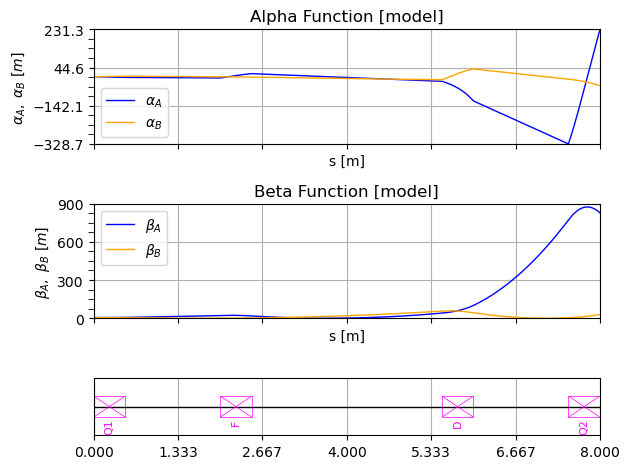

In [32]:
tao.plot(["alpha", "beta"])

Well, that isn't what we were looking for. Our calculations assume a thin-lens approximation, but these are clearly not thin. There's also the issue that our drift lengths, which should be exact to keep $\beta_x=\beta_y$. The two $\beta$'s appear to be offset at the first focus, and the two $\alpha$'s at the second.

In [35]:
%%tao
set ele Quadrupole::* l = 0.05
show lat
scale

-----------------------------------
Tao> set ele Quadrupole::* l = 0.05
-------------
Tao> show lat
# Values shown are for the Downstream End of each Element (Girder elements shown at ref point):
# Index  name      key                       s       l    beta   phi_a    eta   orbit    beta   phi_b    eta   orbit  Track
#                                                            a   [2pi]      x  x [mm]       b   [2pi]      y  y [mm]  State
      0  BEGINNING Beginning_Ele         0.000     ---    5.00   0.000   0.00   0.000    5.00   0.000   0.00   0.000  Alive
      1  Q1        Quadrupole            0.050   0.050    5.02   0.002   0.00   0.000    4.99   0.002   0.00   0.000  Alive
      2  L2        Drift                 1.550   1.500    6.41   0.044   0.00   0.000    4.63   0.052   0.00   0.000  Alive
      3  F         Quadrupole            1.600   0.050    6.44   0.045   0.00   0.000    4.66   0.054   0.00   0.000  Alive
      4  L         Drift                 4.600   3.000    7.

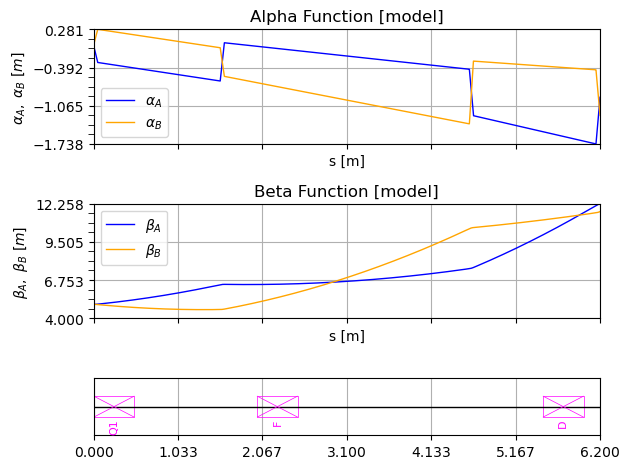

In [36]:
tao.plot(["alpha", "beta"])

Not as terrible, but still nowhere near design. I'm not quite sure where $Q2$ is, but `show lat` suggests it is there. Let's try zero thickness

In [37]:
%%tao
set ele quad::* l = 0.0
show lat
scale

----------------------------
Tao> set ele quad::* l = 0.0
-------------
Tao> show lat
# Values shown are for the Downstream End of each Element (Girder elements shown at ref point):
# Index  name      key                       s       l    beta   phi_a    eta   orbit    beta   phi_b    eta   orbit  Track
#                                                            a   [2pi]      x  x [mm]       b   [2pi]      y  y [mm]  State
      0  BEGINNING Beginning_Ele         0.000     ---    5.00   0.000   0.00   0.000    5.00   0.000   0.00   0.000  Alive
      1  Q1        Quadrupole            0.000   0.000    5.00   0.000   0.00   0.000    5.00   0.000   0.00   0.000  Alive
      2  L2        Drift                 1.500   1.500    5.45   0.046   0.00   0.000    5.45   0.046   0.00   0.000  Alive
      3  F         Quadrupole            1.500   0.000    5.45   0.046   0.00   0.000    5.45   0.046   0.00   0.000  Alive
      4  L         Drift                 4.500   3.000    9.05   0.117   0

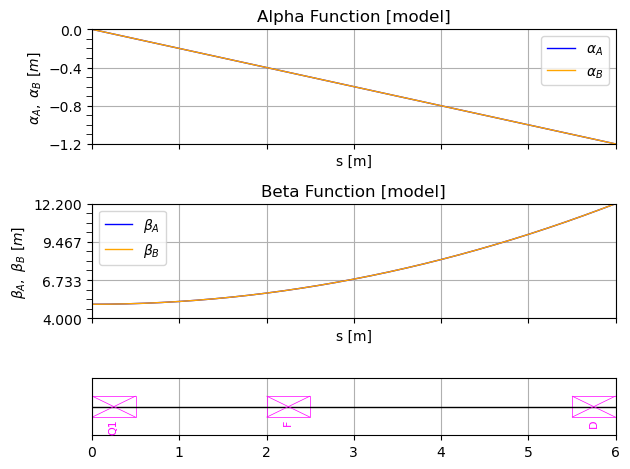

In [38]:
tao.plot(["alpha", "beta"])